Knowledge source:
https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

In [517]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("libs loaded")

libs loaded


In [518]:
data = pd.read_csv(r"housing.data", sep=' +', engine='python', header=None, names=['CRIM','ZN','INDUS','CHAS','NOX', 'RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [519]:
# Very similar in Adaline implementation in Deep Learning repository. Minor changes ONLY in method: predict(). Cause we return continuous values.
class LinearRegression:
    def __init__(self, eta=0.10, epochs=50, is_verbose=False):
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []

    def get_activation(self, x):
        activation = np.dot(x, self.w)
        return activation

    def predict(self, x):
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        return self.get_activation(x_1)

    def fit(self, X, y):
        self.list_of_errors = []
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
        self.w = np.random.rand(X_1.shape[1])
        for e in range(self.epochs):
            error = 0
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
            error = np.square(y - activation).sum()/2.0
            self.list_of_errors.append(error)
            if(self.is_verbose):
                print("NO Epoch = %s, WHERE weights = %s, AND error = %s" % (e, self.w, error))


print("Linear Regression implementation loaded")

Linear Regression implementation loaded


In [520]:
X = data['LSTAT']
X

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [521]:
X = data['LSTAT'].values.reshape(-1,1)
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [522]:
y = data['MEDV'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [523]:
# StandardScaler - standardizes a feature by subtracting the mean and then scaling to unit variance
scaler = StandardScaler()
scaler.fit(X)
X_standarised = scaler.transform(X)
X_standarised

array([[-1.07556230e+00],
       [-4.92439366e-01],
       [-1.20872740e+00],
       [-1.36151682e+00],
       [-1.02650148e+00],
       [-1.04332233e+00],
       [-3.12676184e-02],
       [ 9.10700206e-01],
       [ 2.42177359e+00],
       [ 6.23343950e-01],
       [ 1.09292612e+00],
       [ 8.64783596e-02],
       [ 4.28502391e-01],
       [-6.15792295e-01],
       [-3.35444728e-01],
       [-5.86355801e-01],
       [-8.51284251e-01],
       [ 2.82721656e-01],
       [-1.34996218e-01],
       [-1.92467469e-01],
       [ 1.17282518e+00],
       [ 1.64975678e-01],
       [ 8.50425479e-01],
       [ 1.01302707e+00],
       [ 5.11204923e-01],
       [ 5.40641418e-01],
       [ 3.02345986e-01],
       [ 6.48575231e-01],
       [ 2.05966814e-02],
       [-9.43458210e-02],
       [ 1.39429976e+00],
       [ 5.42383894e-02],
       [ 2.11058779e+00],
       [ 7.98561179e-01],
       [ 1.07750701e+00],
       [-4.16745523e-01],
       [-1.74244877e-01],
       [-5.44303666e-01],
       [-3.5

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X_standarised, y, test_size=0.2)

In [525]:
linear_regression = LinearRegression(eta = 0.001, epochs=50)
linear_regression.fit(X_train, y_train)

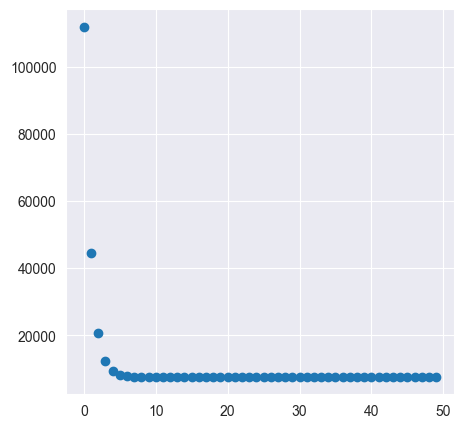

In [526]:
# x = [linear_regression.epochs]
# print(x)
# We aim for convergence
plt.figure(figsize=(5, 5))
plt.scatter(range(linear_regression.epochs), linear_regression.list_of_errors) # where 1st argument is natural number from 0 to 49 epochs (summarized is 50 - counter matters)

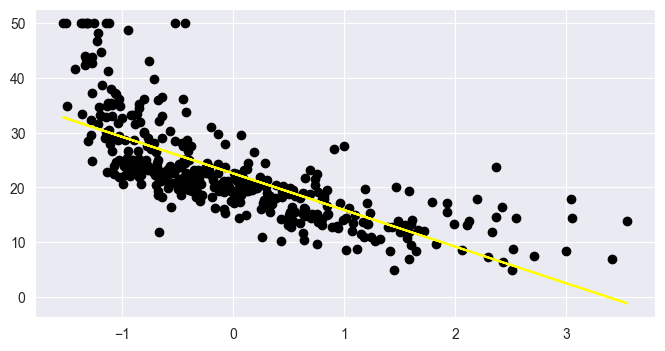

In [527]:
plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, linear_regression.predict(X_train), color='yellow')

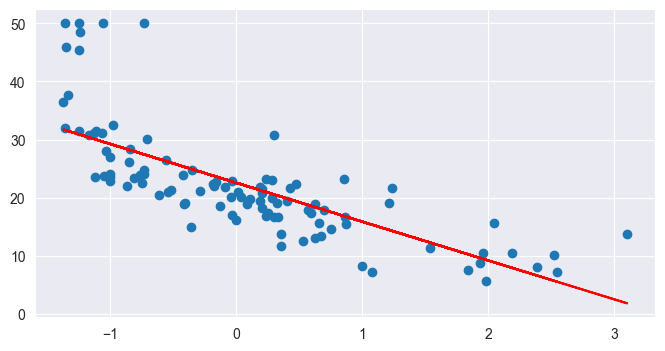

In [528]:
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, linear_regression.predict(X_test), color='red')

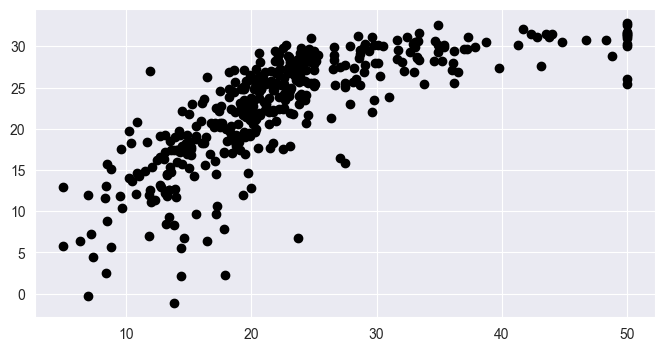

In [529]:
plt.figure(figsize=(8, 4))
plt.scatter(y_train, linear_regression.predict(X_train), color='black')

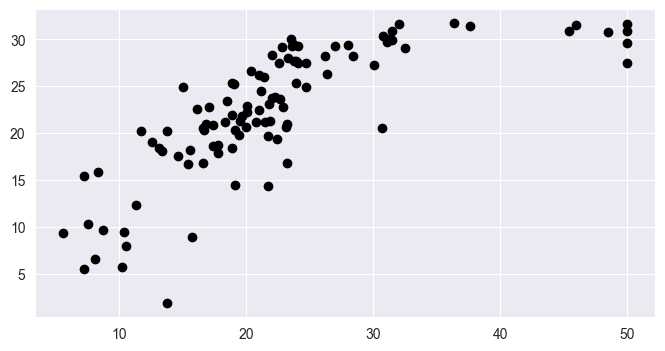

In [530]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, linear_regression.predict(X_test), color='black')

In [531]:
# r_sq = linear_regression.score(X_test, y_test)
# print(f"coefficient of determination: {r_sq}")